<a href="https://colab.research.google.com/github/tocom242242/dog_cat_classification/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import copy
from IPython import display
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
def plot_imgs(input_imgs):
    plt.figure(figsize=(10,10))
    plt_idx = 1
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(input_imgs[i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

In [4]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [5]:
cat_idx = 3
dog_idx = 5

x_cat_train = x_train[np.where(y_train==cat_idx)]
x_cat_test = x_test[np.where(y_test==cat_idx)]

x_dog_train = x_train[np.where(y_train==dog_idx)]
x_dog_test = x_test[np.where(y_test==dog_idx)]

x_train = np.concatenate((x_cat_train, x_dog_train))
x_test = np.concatenate((x_cat_test, x_dog_test))

# 猫が0,犬が1
y_train = np.concatenate((np.zeros(x_cat_train.shape[0]),np.ones(x_dog_train.shape[0])))
y_test = np.concatenate((np.zeros(x_cat_test.shape[0]),np.ones(x_dog_test.shape[0])))



In [6]:
print(x_train.shape)

(10000, 32, 32, 3)


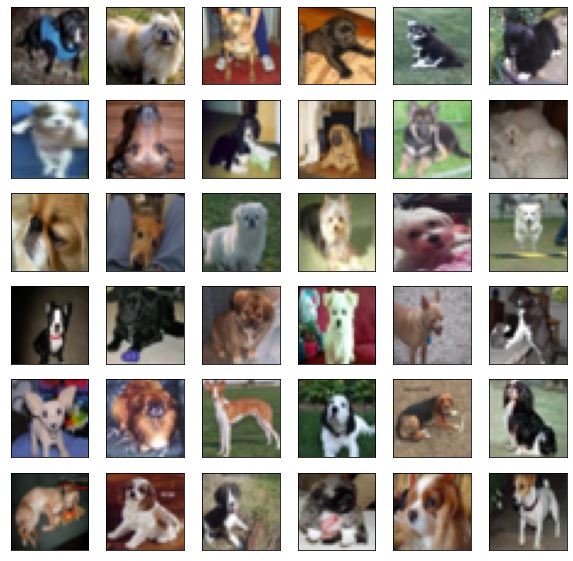

In [21]:
plot_imgs(x_dog_train)

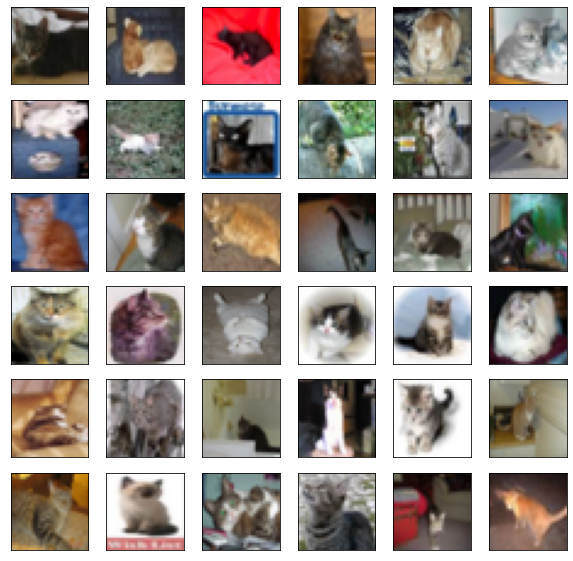

In [7]:
plot_imgs(x_cat_train)

In [8]:

x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.33, random_state=42)

In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_valid, y_valid))

Epoch 1/50
210/210 [==============================] - 10s 26ms/step - loss: 3.3642 - accuracy: 0.5570 - val_loss: 0.6829 - val_accuracy: 0.5667
Epoch 2/50
210/210 [==============================] - 4s 21ms/step - loss: 0.6686 - accuracy: 0.5730 - val_loss: 0.6699 - val_accuracy: 0.5818
Epoch 3/50
210/210 [==============================] - 3s 17ms/step - loss: 0.6553 - accuracy: 0.5994 - val_loss: 0.6613 - val_accuracy: 0.6009
Epoch 4/50
210/210 [==============================] - 3s 13ms/step - loss: 0.6461 - accuracy: 0.5970 - val_loss: 0.6919 - val_accuracy: 0.5764
Epoch 5/50
210/210 [==============================] - 2s 11ms/step - loss: 0.6313 - accuracy: 0.6193 - val_loss: 0.6561 - val_accuracy: 0.6085
Epoch 6/50
210/210 [==============================] - 2s 12ms/step - loss: 0.6252 - accuracy: 0.6316 - val_loss: 0.6622 - val_accuracy: 0.6152
Epoch 7/50
210/210 [==============================] - 3s 12ms/step - loss: 0.6109 - accuracy: 0.6460 - val_loss: 0.6693 - val_accuracy: 0.610

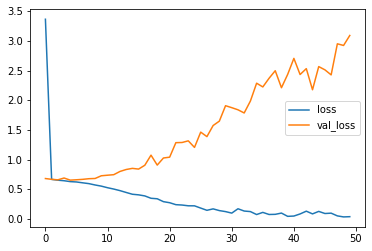

In [11]:
history = history.history
plt.plot(np.arange(len(history["loss"])),history["loss"], label="loss")
plt.plot(np.arange(len(history["val_loss"])),history["val_loss"], label="val_loss")
plt.legend()

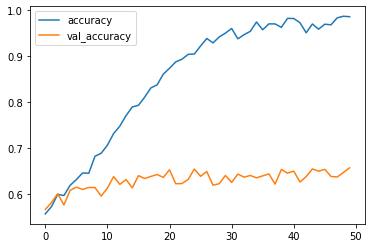

In [12]:
plt.plot(np.arange(len(history["accuracy"])), history["accuracy"], label="accuracy")
plt.plot(np.arange(len(history["val_accuracy"])), history["val_accuracy"], label="val_accuracy")
plt.legend()

In [13]:
def plot_imgs_labels(model,input_imgs):
    plt.figure(figsize=(10,10))
    plt_idx = 1
    outputs = model(input_imgs, training=True)
    outputs = tf.squeeze(outputs).numpy()
    labels = np.round(outputs)

    plt_indexs = np.random.randint(0,len(labels),size=36)
    print(labels.shape)
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt_i = plt_indexs[i]
        if plt_i == 1:
            label = "dog"
        else:
            label = "cat"
        plt.title("{}".format(label))
        plt.imshow(np.squeeze(input_imgs[plt_i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

(6700,)


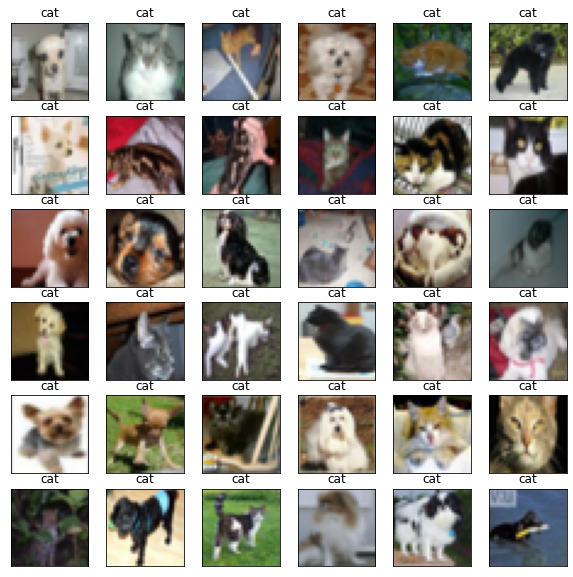

In [14]:
plot_imgs_labels(model, x_train)

(2000,)


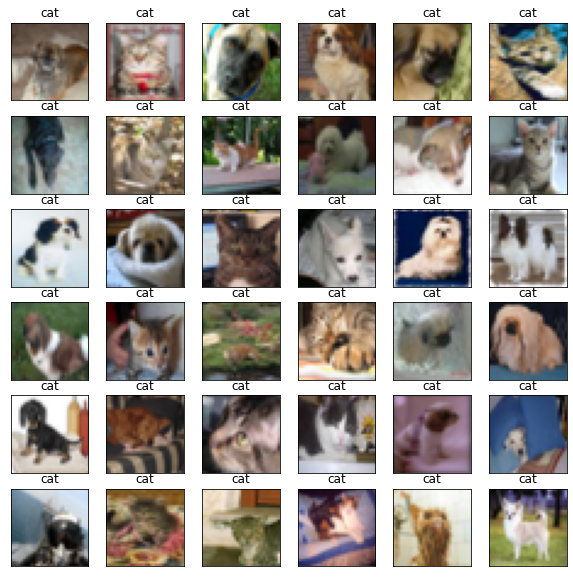

In [15]:
plot_imgs_labels(model, x_test)

In [16]:

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32 ,3)),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_valid, y_valid))
history = history.history

Epoch 1/50
210/210 [==============================] - 5s 16ms/step - loss: 0.7403 - accuracy: 0.6269 - val_loss: 0.7842 - val_accuracy: 0.6076
Epoch 2/50
210/210 [==============================] - 3s 17ms/step - loss: 0.5458 - accuracy: 0.7275 - val_loss: 0.6852 - val_accuracy: 0.6579
Epoch 3/50
210/210 [==============================] - 3s 15ms/step - loss: 0.4783 - accuracy: 0.7681 - val_loss: 0.6676 - val_accuracy: 0.6721
Epoch 4/50
210/210 [==============================] - 3s 14ms/step - loss: 0.4105 - accuracy: 0.8060 - val_loss: 0.6484 - val_accuracy: 0.7003
Epoch 5/50
210/210 [==============================] - 3s 15ms/step - loss: 0.3454 - accuracy: 0.8464 - val_loss: 0.6749 - val_accuracy: 0.6955
Epoch 6/50
210/210 [==============================] - 3s 15ms/step - loss: 0.2871 - accuracy: 0.8758 - val_loss: 0.7602 - val_accuracy: 0.6900
Epoch 7/50
210/210 [==============================] - 3s 15ms/step - loss: 0.2347 - accuracy: 0.9021 - val_loss: 0.7402 - val_accuracy: 0.6973

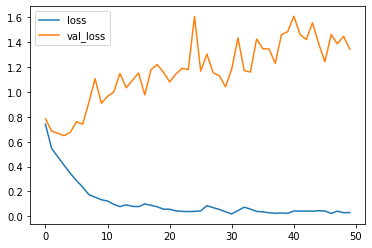

In [18]:
plt.plot(np.arange(len(history["loss"])),history["loss"], label="loss")
plt.plot(np.arange(len(history["val_loss"])),history["val_loss"], label="val_loss")
plt.legend()

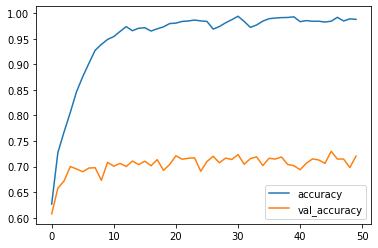

In [19]:
plt.plot(np.arange(len(history["accuracy"])), history["accuracy"], label="accuracy")
plt.plot(np.arange(len(history["val_accuracy"])), history["val_accuracy"], label="val_accuracy")
plt.legend()

(2000,)


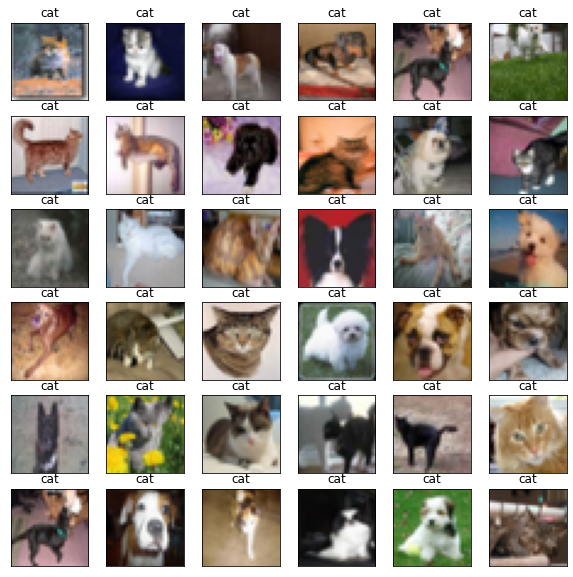

In [20]:
plot_imgs_labels(model, x_test)